# 特征提取——基于特征值分解矩阵原理

离散有限K-L展开（计算步骤）$y=W^T x$ 

 1. 计算产生矩阵R
 
 2. 计算R的特征值并且由大到小排序为$\lambda_1,\lambda_2,......,\lambda_d$
 
 3. 计算这些特征值对应特征向量$\varphi_1,\varphi_2,......,\varphi_d$
 
 4. 变换矩阵 $W=[\varphi_1,\varphi_2,......,\varphi_d]$

 - 样本的自相关矩阵 $R=E[XX^T]$

 - 样本的总体离差矩阵$S_T=\frac{1}{N}\sum_{i=1}^{N}(x_i-m)(x_i-m)^T$

 - 样本总类内散度矩阵$S_w=\sum_{i=1}^cE[(x-m_i)(x-m_i)^T]$

## 实验结果比较思路

1. 自己实现的PCA与库函数得到的结果进行比较。

2. 利用自己实现的PCA将数据从三维降到二维，再用贝叶斯分类器训练，与实验二比较。

3. 利用自己实现的PCA将数据从三维降到一维，再用Fisher线性分类器训练，与实验三比较。

In [1]:
# 导入基本库
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

## PCA实现

In [2]:
def self_pca(X,k): # k is the components you want
    
    n_samples,n_features = X.shape
    # mean of each feature
    mean = np.array([np.mean(X[:,i]) for i in range(n_features)])
    # normolization
    norm_X = X-mean
    # 自相关矩阵
    scatter_matrix = np.dot(np.transpose(norm_X),norm_X)
    # 计算特征值和对应的特征向量
    eig_val,eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = dict(zip(eig_val,eig_vec))
    # 特征值排序
    eig_pairs = list(eig_pairs.items())
    eig_pairs.sort(key=lambda x:x[0],reverse=True)
    # 提取出特征向量
    feature = np.array([ele[1] for ele in eig_pairs[:k]])
    print(feature)
    # get new data
    data = np.dot(norm_X,np.transpose(feature))
    return data

In [3]:
X = np.array([[-1,1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
self_pca(X,1)

[[ 0.8549662  -0.51868371]]


array([[-1.20075534],
       [-1.01835413],
       [-1.35463662],
       [ 0.50917706],
       [ 1.36414327],
       [ 1.70042576]])

In [4]:
# from sklearn 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
pca.transform(X)

array([[ 0.50917706],
       [ 2.40151069],
       [ 3.7751606 ],
       [-1.20075534],
       [-2.05572155],
       [-3.42937146]])

## 数据预处理

In [5]:
colume_names = ['','gender','height','weight','size']
df= pd.read_excel('data/gender.xlsx',index_col=0,names=colume_names)
df.head(5)

,gender,height,weight,size
,,,,
1,女,163.0,62.0,36.0
2,女,158.0,42.0,36.0
3,男,168.0,67.0,42.0
4,男,180.0,67.0,41.0
5,男,180.0,75.0,46.0


In [6]:
df.shape

(571, 4)

In [7]:
# 性别数据转换
df.replace('男',1,inplace=True)
df.replace('女',2,inplace=True)
df.head(5)

,gender,height,weight,size
,,,,
1,2,163.0,62.0,36.0
2,2,158.0,42.0,36.0
3,1,168.0,67.0,42.0
4,1,180.0,67.0,41.0
5,1,180.0,75.0,46.0


## 1. 特征提取 ： 三维->二维

In [8]:
# 自己实现的PCA
self_pca_res = self_pca(np.array(df[['height','weight','size']]),2)
# PCA库函数
pca = PCA(n_components=2)
dataX = np.array(df[['height','weight','size']])
pca.fit(dataX)
pca_res = pca.transform(dataX)

[[ 0.56989566  0.7941269  -0.21114309]
 [ 0.80296067 -0.59277629 -0.06221277]]


In [9]:
# 数据合并 ： 加上类别
self_data = pd.concat([pd.DataFrame(self_pca_res,index=list(range(1,572,1))), df['gender']], axis=1)
self_data.columns = ['feature1', 'feature2', 'category']

data = pd.concat([pd.DataFrame(pca_res,index=list(range(1,572,1))), df['gender']], axis=1)
data.columns = ['feature1', 'feature2', 'category']
data.head(5)

,feature1,feature2,category
1,-0.720249,7.333756,2
2,-19.628941,-0.551135,2
3,7.191425,5.522494,1
4,13.855607,-3.872944,1
5,21.152120,0.198842,1


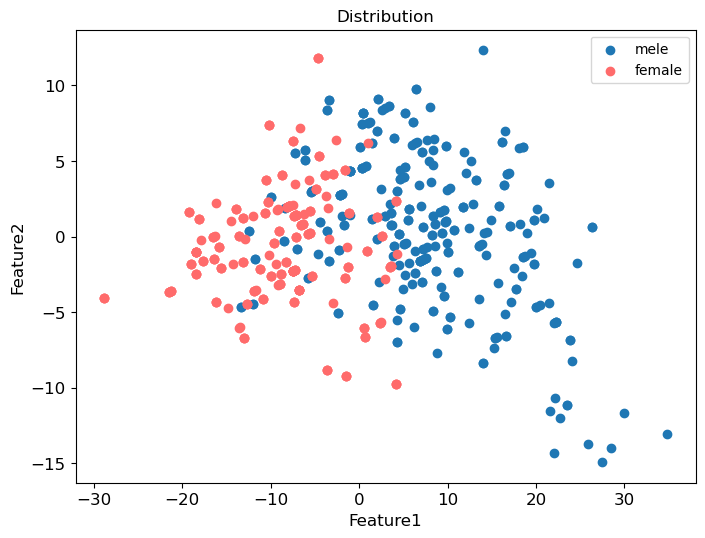

In [10]:
cate1_df = self_data.loc[self_data['category']==1]
cate2_df = self_data.loc[self_data['category']==2]
# 二元高斯概率分布图水平面投影
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(cate1_df.feature1, cate1_df.feature2)
plt.scatter(cate2_df.feature1, cate2_df.feature2,color='#ff6b6b')
plt.xlabel('Feature1',fontsize=12)
plt.ylabel('Feature2',fontsize=12) 
plt.title('Distribution',fontsize=12)
plt.legend(["mele","female"])
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

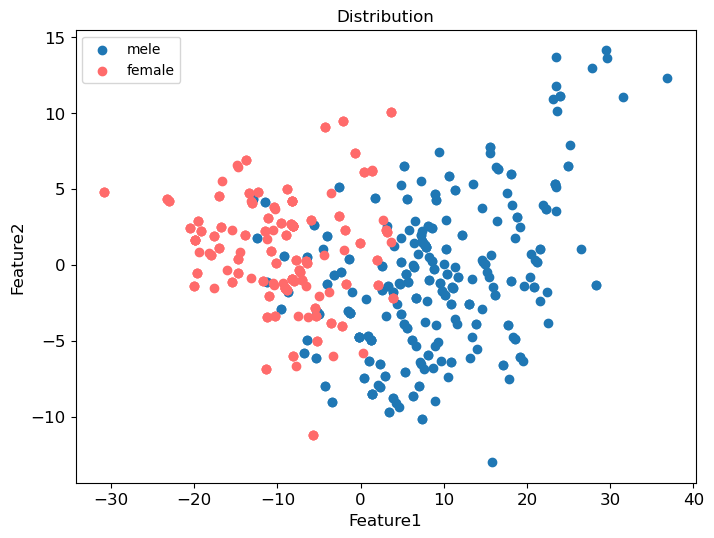

In [11]:
cate1_df = data.loc[data['category']==1]
cate2_df = data.loc[data['category']==2]
# 二元高斯概率分布图水平面投影
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(cate1_df.feature1, cate1_df.feature2)
plt.scatter(cate2_df.feature1, cate2_df.feature2,color='#ff6b6b')
plt.xlabel('Feature1',fontsize=12)
plt.ylabel('Feature2',fontsize=12) 
plt.title('Distribution',fontsize=12)
plt.legend(["mele","female"])
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

## 贝叶斯分类器分类测试

In [12]:
# 按最小错误率原则分类，则根据后验概率判定
class bayes_error_2d():
    def __init__(self):
        # 先验概率
        self.p_w1 = 0
        self.p_w2 = 0
        # 均值
        self.u1 = []
        self.u2 = []
        # 协方差矩阵
        self.cov1 = []
        self.cov2 = []
        # 概率值
        self.pro = pd.DataFrame(columns=['cate1','cate2'])

    # 训练

    def fit(self, x_train, y_train):

        # 根据比例确定先验概率:
        num = list(y_train.value_counts())
        male_num = num[0]
        female_num = num[1]

        self.p_w1 = male_num / len(y_train)
        self.p_w2 = female_num / len(y_train)

        cate_df = pd.concat([x_train, y_train], axis=1)
        cate_df.columns = ['feature1', 'feature2', 'category']
        cate1_df = cate_df.loc[cate_df['category'] == 1]
        cate2_df = cate_df.loc[cate_df['category'] == 2]

        # 估计概率分布 (计算样本期望 μ 和 协方差 cov)
        u1_1 = cate1_df.feature1.mean()
        u1_2 = cate1_df.feature2.mean()
        self.u1 = np.array([u1_1, u1_2])
        u2_1 = cate2_df.feature1.mean()
        u2_2 = cate2_df.feature2.mean()
        self.u2 = np.array([u2_1, u2_2])

        # 协方差矩阵
        cov1_1 = cate1_df.feature1.cov(cate1_df.feature1)
        cov1_2 = cate1_df.feature1.cov(cate1_df.feature2)
        cov1_3 = cate1_df.feature2.cov(cate1_df.feature1)
        cov1_4 = cate1_df.feature2.cov(cate1_df.feature2)
        self.cov1 = np.array([[cov1_1, cov1_2], [cov1_3, cov1_4]])
        cov2_1 = cate2_df.feature1.cov(cate2_df.feature1)
        cov2_2 = cate2_df.feature1.cov(cate2_df.feature2)
        cov2_3 = cate2_df.feature2.cov(cate2_df.feature1)
        cov2_4 = cate2_df.feature2.cov(cate2_df.feature2)
        self.cov2 = np.array([[cov2_1, cov2_2], [cov2_3, cov2_4]])

    # 预测
    def predict(self, x_test):
        x_test = x_test.values
        y_predict = []
        # 判别
        for i in range(len(x_test)):
            # p_w1:category1先验概率
            # p_w2:category2先验概率
            x = x_test[i]
            g_1 = -0.5*(x-self.u1).dot(np.linalg.inv(self.cov1)).dot(x-self.u1)
            -0.5*np.log(abs(self.cov1))+np.log(self.p_w1)
            g_2 = -0.5*(x-self.u2).dot(np.linalg.inv(self.cov2)).dot(x-self.u2)
            -0.5*np.log(abs(self.cov2))+np.log(self.p_w2)

            result = g_1 - g_2
            if result > 0:
                y_predict.append(1)
            else:
                y_predict.append(2)
            self.pro.loc[i] = [g_1,g_2]
        return y_predict

    # predict_proba()方法返回一个数组，其中每一行是一个样本，而每一列则是一个类别，每一条数据包含给定实例属于该给定类别的概率

    def predict_proba(self, x_test):
        return self.pro.values

In [13]:
# 主成分数据
X = data.iloc[:,0:2] # 特征
Y = data.iloc[:,2] # 标签

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
k = 10
kf = KFold(n_splits=k,shuffle=True)

In [15]:
accuracies = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train_index, test_index in kf.split(data):  # 拆分

    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = bayes_error_2d()  # 模型原型 选择
    model.fit(x_train, y_train)  # 训练
    y_predict = model.predict(x_test)  # 预测

    # predict_proba()方法返回一个数组，其中每一行是一个样本，而每一列则是一个类别，每一条数据包含给定实例属于该给定类别的概率
    y_probas = model.predict_proba(x_test)
    y_scores = y_probas[:, 1]  # score = proba of positive class

    fpr, tpr, thersholds = roc_curve(
        y_test, y_scores, pos_label=2)  # roc_curve()函数计算不同阈值的TPR和FPR

    # interp:插值 把结果添加到tprs列表中
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    # 计算auc
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    accuracy = accuracy_score(y_pred=y_predict, y_true=y_test)
    accuracies.append(accuracy)
    i += 1

# 平均错误率
print('bayes_error average: ', np.mean(accuracies))

bayes_error average:  0.842377495462795


In [16]:
# 体重身高数据
X1 = df.iloc[:,2:4] # 特征
Y1 = df.iloc[:,0] # 标签

In [17]:
# 身高鞋码数据
X2 = df.iloc[:,1:3] # 特征
Y2 = df.iloc[:,0] # 标签

In [18]:
accuracies1 = []
tprs1 = []
aucs1 = []
mean_fpr1 = np.linspace(0, 1, 100)
i = 0

for train_index, test_index in kf.split(df):  # 拆分

    x_train, x_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = Y1.iloc[train_index], Y1.iloc[test_index]

    model = bayes_error_2d()  # 模型原型 选择
    model.fit(x_train, y_train)  # 训练
    y_predict = model.predict(x_test)  # 预测

    # predict_proba()方法返回一个数组，其中每一行是一个样本，而每一列则是一个类别，每一条数据包含给定实例属于该给定类别的概率
    y_probas = model.predict_proba(x_test)
    y_scores = y_probas[:, 1]  # score = proba of positive class

    fpr, tpr, thersholds = roc_curve(
        y_test, y_scores, pos_label=2)  # roc_curve()函数计算不同阈值的TPR和FPR

    # interp:插值 把结果添加到tprs列表中
    tprs1.append(np.interp(mean_fpr1, fpr, tpr))
    tprs1[-1][0] = 0.0
    # 计算auc
    roc_auc = auc(fpr, tpr)
    aucs1.append(roc_auc)
    
    accuracy = accuracy_score(y_pred=y_predict, y_true=y_test)
    accuracies1.append(accuracy)
    i += 1

# 平均错误率
print('bayes_error average: ', np.mean(accuracies))

bayes_error average:  0.842377495462795


In [19]:
accuracies2 = []
tprs2 = []
aucs2 = []
mean_fpr2 = np.linspace(0, 1, 100)
i = 0

for train_index, test_index in kf.split(df):  # 拆分

    x_train, x_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = Y2.iloc[train_index], Y2.iloc[test_index]

    model = bayes_error_2d()  # 模型原型 选择
    model.fit(x_train, y_train)  # 训练
    y_predict = model.predict(x_test)  # 预测

    # predict_proba()方法返回一个数组，其中每一行是一个样本，而每一列则是一个类别，每一条数据包含给定实例属于该给定类别的概率
    y_probas = model.predict_proba(x_test)
    y_scores = y_probas[:, 1]  # score = proba of positive class

    fpr, tpr, thersholds = roc_curve(
        y_test, y_scores, pos_label=2)  # roc_curve()函数计算不同阈值的TPR和FPR

    # interp:插值 把结果添加到tprs列表中
    tprs2.append(np.interp(mean_fpr2, fpr, tpr))
    tprs2[-1][0] = 0.0
    # 计算auc
    roc_auc = auc(fpr, tpr)
    aucs2.append(roc_auc)
    
    accuracy = accuracy_score(y_pred=y_predict, y_true=y_test)
    accuracies2.append(accuracy)
    i += 1

# 平均错误率
print('bayes_error average: ', np.mean(accuracies))

bayes_error average:  0.842377495462795


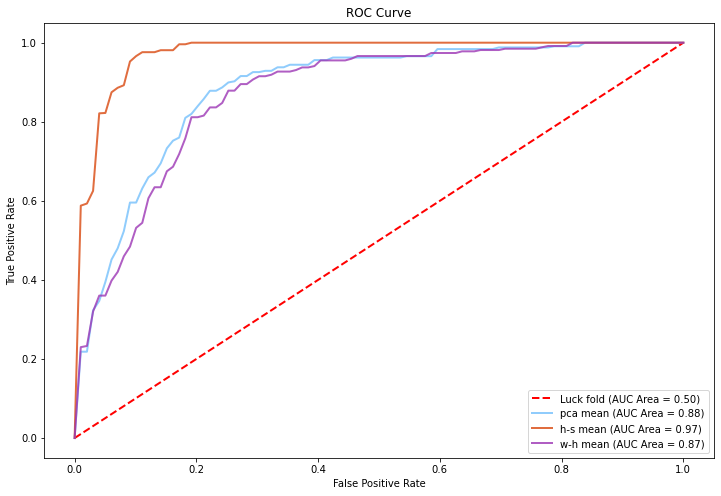

In [20]:
# 绘制ROC曲线对比图
plt.figure(figsize=(12, 8))
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])


plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--',
         label='Luck fold (AUC Area = {0:.2f})'.format(0.5))  # 绘制对角线

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)  # 计算平均AUC值
std_auc = np.std(tprs, axis=0)
plt.plot(mean_fpr, mean_tpr, color='#74c0fc',
         label='pca mean (AUC Area = {0:.2f})'.format(mean_auc), lw=2, alpha=.8)

mean_tpr1 = np.mean(tprs1, axis=0)
mean_tpr1[-1] = 1.0
mean_auc1 = auc(mean_fpr1, mean_tpr1)  # 计算平均AUC值
std_auc1 = np.std(tprs1, axis=0)
plt.plot(mean_fpr1, mean_tpr1, color='#d9480f',
         label='h-s mean (AUC Area = {0:.2f})'.format(mean_auc1), lw=2, alpha=.8)

mean_tpr2 = np.mean(tprs2, axis=0)
mean_tpr2[-1] = 1.0
mean_auc2 = auc(mean_fpr2, mean_tpr2)  # 计算平均AUC值
std_auc2 = np.std(tprs2, axis=0)
plt.plot(mean_fpr2, mean_tpr2, color='#9c36b5',
         label='w-h mean (AUC Area = {0:.2f})'.format(mean_auc2), lw=2, alpha=.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

结果分析：

比较三种不同特征数据的ROC曲线AUC面积，可以看出特征为w-h(身高和鞋码)的AUC面积最大，说明用身高和鞋码作为分类特征的效果最好。用PCA得到的二维主成分数据效果反而一般。过拟合？

## 2. 特征提取 ： 三维->一维

In [21]:
# 自己实现的PCA
self_pca_res = self_pca(np.array(df[['height','weight','size']]),1)
# PCA库函数
pca = PCA(n_components=1)
dataX = np.array(df[['height','weight','size']])
pca.fit(dataX)
pca_res = pca.transform(dataX)

[[ 0.56989566  0.7941269  -0.21114309]]


In [22]:
# 数据合并 ： 加上类别
self_data = pd.concat([pd.DataFrame(self_pca_res,index=list(range(1,572,1))), df['gender']], axis=1)
self_data.columns = ['feature1','category']

data = pd.concat([pd.DataFrame(pca_res,index=list(range(1,572,1))), df['gender']], axis=1)
data.columns = ['feature1','category']
data.head(5)

,feature1,category
1,-0.720249,2
2,-19.628941,2
3,7.191425,1
4,13.855607,1
5,21.152120,1


## Fisher线性分类器测试

In [23]:
# Fisher准则分类器
class FisherLiner():
    def __init__(self):
        self.pro = []
        self.w_ = []
        self.w0 = []

    # 训练

    def fit(self, x_train, y_train):

        cate_df = pd.concat([x_train, y_train], axis=1)
        cate_df.columns = ['feature1', 'feature2', 'category']
        cate1_df = cate_df.loc[cate_df['category'] == 1]
        cate2_df = cate_df.loc[cate_df['category'] == 2]

        # 计算各类样本均值
        M1 = cate1_df.mean().values[0:2]
        M2 = cate2_df.mean().values[0:2]

        # 计算 𝑆1和𝑆2 (样本类内离散矩阵)
        S1 = np.matrix(np.zeros((2, 2)))
        for x in cate1_df.values:
            S = np.matrix(x[0:2]-M1).T @ np.matrix(x[0:2]-M1)
            S1 = S1+S
        S2 = np.matrix(np.zeros((2, 2)))
        for x in cate2_df.values:
            S = np.matrix(x[0:2]-M2).T @ np.matrix(x[0:2]-M2)
            S2 = S2+S

        # 计算投影权重矩阵 W_
        S_w = S1+S2
        S_w_inv = np.linalg.inv(S_w)
        self.w_ = S_w_inv @ (M1-M2)
        # 计算投影后样本的均值
        m1 = self.w_ @ M1
        m2 = self.w_ @ M2
        
        self.w0 = (m1+m2)/2
        # 利用先验知识选择分界阈值点W0:
#         num = list(cate_df['category'].value_counts())
#         male_num = num[0]
#         female_num = num[1]
#         self.w0 = (male_num*m1+female_num*m2)/(male_num+female_num)  # 根据比例确定

        
    def predict(self, x_test):
        x_test = x_test.values
        y_predict = []
        # 判别
        for i in range(len(x_test)):
            x = x_test[i][0]
            y = x_test[i][1]
        # 投影并与分界值比较
#             result = self.w_ @ np.matrix(x).T - self.w0
            result = self.w_[(0,0)]*x+self.w_[(0,1)]*y- self.w0
            if result > 0:
                y_predict.append(1)
            else:
                y_predict.append(2)
        return y_predict

## 实验结果比较